In [ ]:
!pip install mediapipe 

In [ ]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mediapipe as mp
import cv2
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

E0000 00:00:1750787450.076025      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750787450.129626      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

# Extracting Landmark's Position

In [ ]:
data = []
labels = []

DATA_DIR = "C:\Users\Lenovo\SignSpeak-Real-Time-ASL-Sign-Language-to-Speech-Converter\asl_alphabet_test.zip"

for label in os.listdir(DATA_DIR):
    folder_path = os.path.join(DATA_DIR, label)
    for img_file in tqdm(os.listdir(folder_path), desc=f"Processing {label}"):
        img_path = os.path.join(folder_path, img_file)
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)

        if results.multi_hand_landmarks:
            landmark_list = []
            for lm in results.multi_hand_landmarks[0].landmark:
                landmark_list.extend([lm.x, lm.y, lm.z])
            data.append(landmark_list)
            labels.append(label)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1750787460.979940      71 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750787461.010075      71 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing J: 100%|██████████| 3000/3000 [01:43<00:00, 28.86it/s]


In [5]:
X = np.array(data)
y = np.array(labels)

# Label Encoding

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [7]:
X.shape

(63676, 63)

# Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Model Training

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Performance on X_test

In [10]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9836683417085427
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       437
           1       1.00      1.00      1.00       441
           2       0.99      0.99      0.99       398
           3       0.99      0.99      0.99       493
           4       0.97      0.99      0.98       462
           5       1.00      0.99      1.00       575
           6       0.97      1.00      0.98       488
           7       1.00      0.99      0.99       479
           8       0.99      0.97      0.98       477
           9       1.00      0.99      0.99       516
          10       0.99      0.99      0.99       540
          11       1.00      0.99      1.00       505
          12       0.95      0.96      0.96       313
          13       0.95      0.93      0.94       255
          14       0.99      0.99      0.99       453
          15       1.00      0.98      0.99       408
          16       0.98      0.99      0.99       41

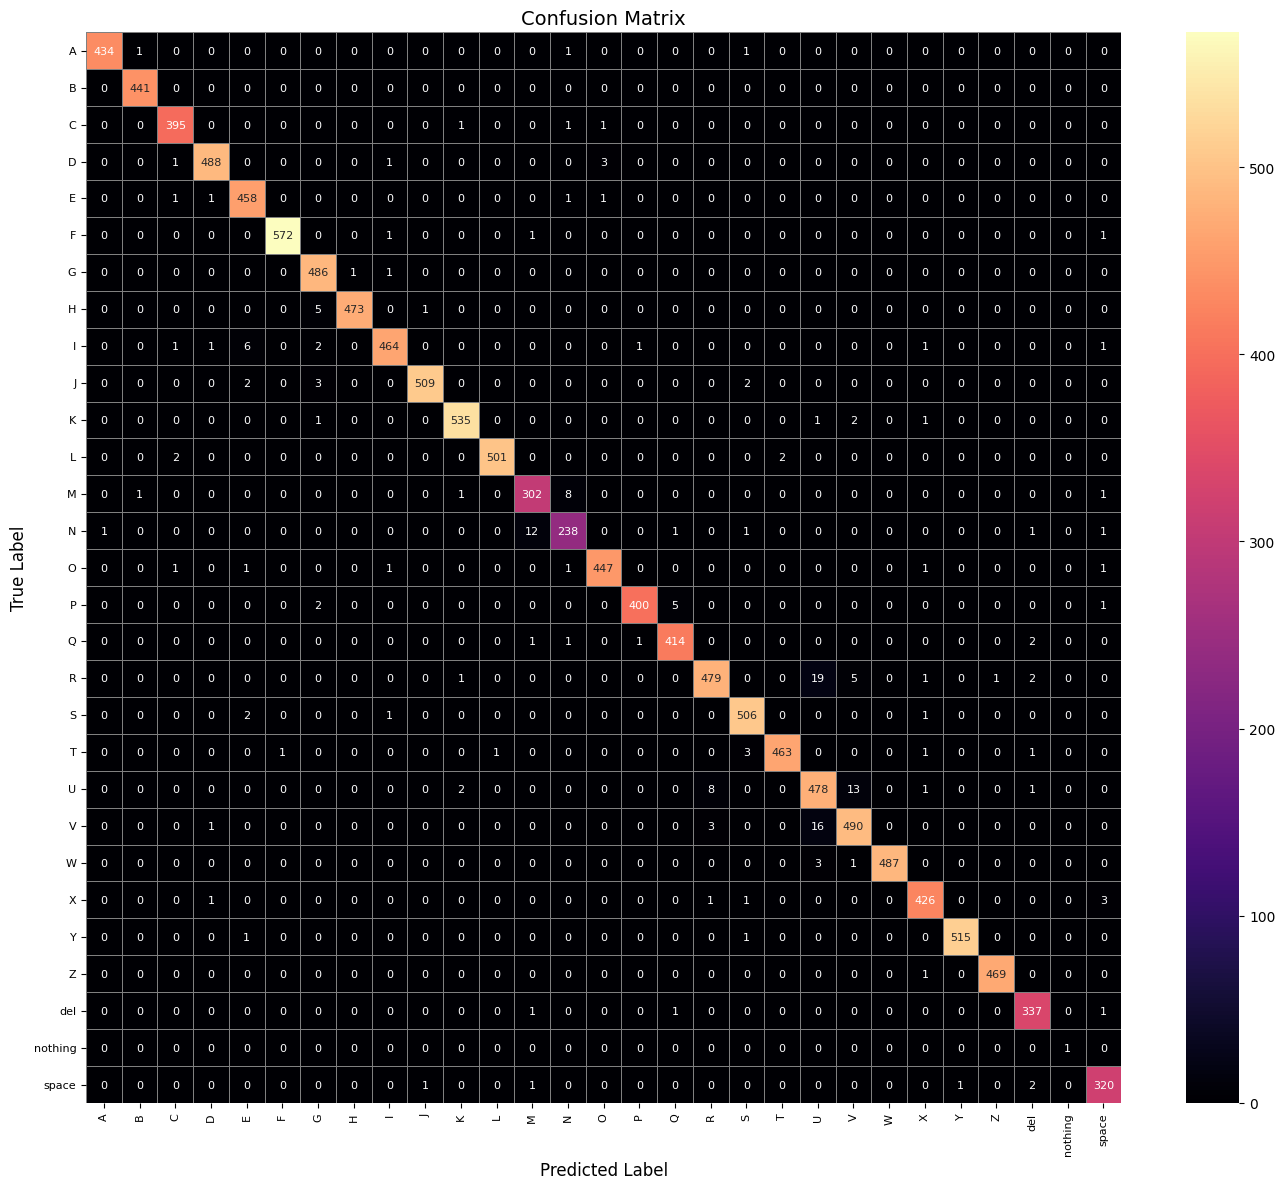

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Get label names from label encoder
labels = le.classes_

plt.figure(figsize=(14, 12))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='magma', 
            linewidths=0.5, 
            linecolor='gray',
            xticklabels=labels,
            yticklabels=labels,
            annot_kws={"size": 8})

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(model, "C:\Users\Lenovo\ASL-Sign-Language\modelmodel.joblib")
joblib.dump(le, "C:\Users\Lenovo\ASL-Sign-Language\modellabel_encoder.joblib")

['/kaggle/working/label_encoder.joblib']